In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


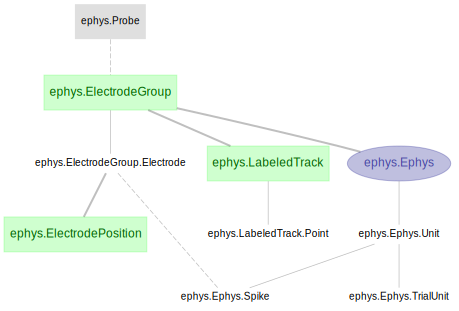

In [3]:
dj.ERD(ephys)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

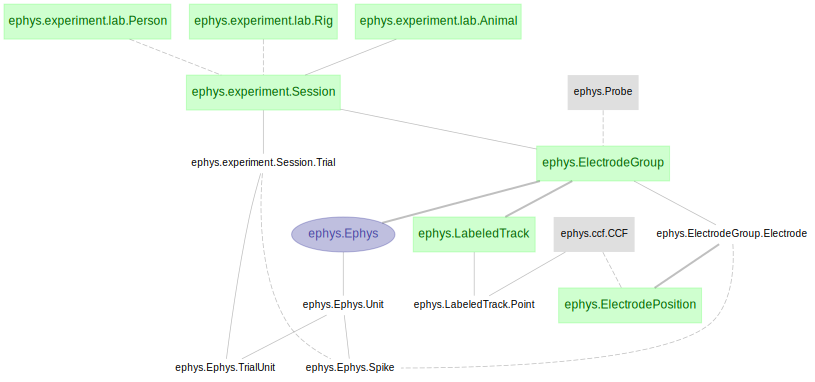

In [5]:
dj.ERD(ephys)-2

In [6]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123456, '2017-08-01'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
399752,2017-08-01
400483,2017-08-01


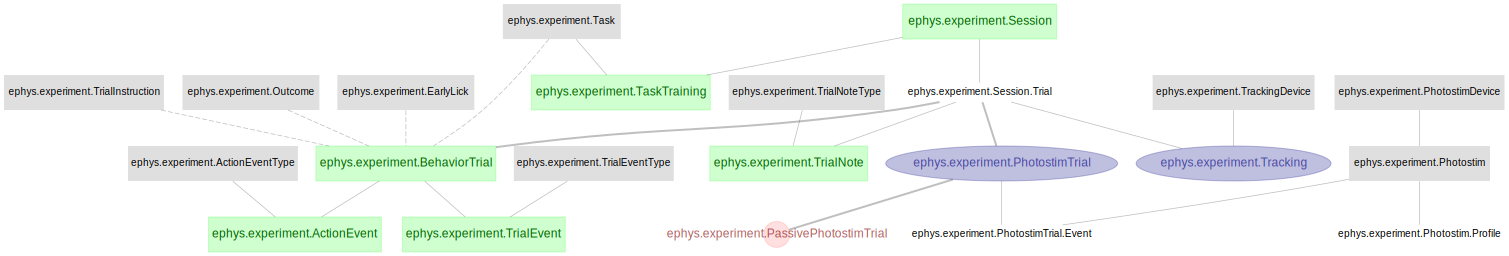

In [7]:
dj.ERD(ephys.experiment)

In [8]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig,behavior_file the behavior file name
123456,53,2017-10-21,daveliu,RRig,tw5_TW_autoTrain_20171021_150914.mat
399752,1,2017-11-14,daveliu,TRig1,dl7_TW_autoTrain_20171114_144434.mat
399752,2,2017-11-16,daveliu,TRig1,dl7_TW_autoTrain_20171116_123237.mat
399752,3,2017-11-18,daveliu,TRig1,dl7_TW_autoTrain_20171118_141139.mat
399752,4,2017-11-19,daveliu,TRig1,dl7_TW_autoTrain_20171119_122727.mat
399752,5,2017-11-19,daveliu,TRig1,dl7_TW_autoTrain_20171119_130846.mat
399752,6,2017-11-20,daveliu,TRig1,dl7_TW_autoTrain_20171120_132218.mat


In [9]:
rig=ephys.experiment.lab.Rig()
rig
#rig.insert1(('RRig','Recording Rig'))

rig,rig_description
RRig,Recording Rig
TRig1,Training rig 1
TRig2,Training rig 2


In [10]:
ephys.Probe()

probe_part_no,probe_description
123123123,neuropixel probe


In [11]:
eGroup=ephys.ElectrodeGroup()

In [12]:
#eGroup.insert1((123456, 53, 1, '123123123', 'C:\\Users\\liul.HHMI\\Desktop\\real5ap_imec3_opt3_jrc.mat'))

In [13]:
eIns=eGroup.fetch1('animal', 'session', 'electrode_group')
elect=eGroup.Electrode()
eIns
elect
#elect.insert(eIns, 0)

animal Janelia ANM ID (6 digits),session session number,electrode_group,electrode


In [14]:
import scipy.io as spio
import numpy as np

In [15]:
eIns

(123456, 53, 1)

In [16]:
import h5py
root="C:\\Users\\liul.HHMI\\Desktop\\"
data_file = root + 'real5ap_imec3_opt3_jrc.mat'

In [17]:
f = h5py.File(data_file,'r')
ind = np.argsort(f['viTime_spk'][0]) # index of sorted spiketimes
jrc_file_name = data_file
cluster_ids = f['S_clu']['viClu'][0][ind] # cluster number
spike_times = f['viTime_spk'][0][ind] # spike times
viT_offset_file = f['viT_offset_file'][:][0] # spike times
rows=[] # getting the clusters
#for cluster in sorted(cluster_ids):
    #if cluster>0: # if not noise clusters
        #rows.append([cluster,f['S_clu']['viSite_clu'][cluster-1][0],f['S_clu']['vrVpp_clu'][0][cluster-1],
                     #f['S_clu']['vrPosX_clu'][0][cluster-1],f['S_clu']['vrPosY_clu'][0][cluster-1],
                    #f['S_clu']['vrSnr_clu'][0][cluster-1],f['S_clu']['vnSite_clu'][0][cluster-1],
                    #f['S_clu']['vrIsoDist_clu'][0][cluster-1],f['S_clu']['vrLRatio_clu'][0][cluster-1],
                    #f['S_clu']['vrIsiRatio_clu'][0][cluster-1]])

In [18]:
len(spike_times)

3312841

In [19]:
len(cluster_ids)

3312841

In [20]:
eGroup

animal Janelia ANM ID (6 digits),session session number,electrode_group,probe_part_no,ephys_filepath
123456,53,1,123123123,C:\Users\liul.HHMI\Desktop\real5ap_imec3_opt3_jrc.mat


In [21]:
spike_times[1]

19

In [22]:
Ephys=ephys.Ephys()

In [23]:
Ephys.populate()

{'animal': 123456, 'session': 53, 'electrode_group': 1}


In [24]:
trialNote = ephys.experiment.TrialNote()

In [25]:
import numpy as np

In [26]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [27]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [28]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [29]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [30]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [31]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

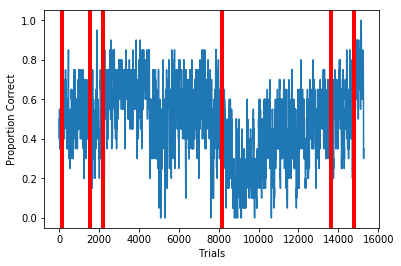

In [32]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

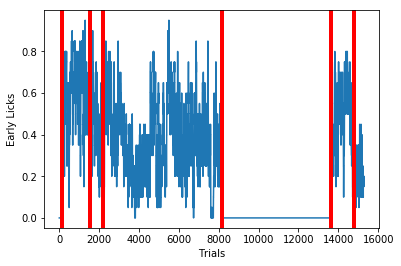

In [33]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [34]:
ephys.experiment.ActionEvent()

animal Janelia ANM ID (6 digits),session session number,trial,action_event_type,action_event_time (s) from trial or session (it depends but please figure it out)
123456,53,0,left lick,4.5963
123456,53,0,left lick,4.7489
123456,53,0,left lick,5.2532
123456,53,0,left lick,5.4285
123456,53,0,right lick,4.7286
123456,53,0,right lick,4.8735
123456,53,0,right lick,5.3707
